In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

theme = ['#16A085','#DBFE87','#FFE381','#1C448E','#2D3319','#EDF184','#8E9488','#79CF86',
         '#48B886','#253C54','#BCD984','#214071','#E57A44','#7E8D65','#F2AF63','#A18261',
         '#725151','#D0B371']

## Discretización

In [3]:
df = pd.read_csv('../data/sin_nulos_ventana_2_dias.csv')

In [4]:
df = df.drop(columns=['Date', 'Location'])

print(df.head(20).to_string())

    MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow RainYesterday Rain2daysAgo  SunshineYesterday  Sunshine2daysAgo  EvaporationYesterday  Evaporation2daysAgo  MaxTempYesterday  MaxTemp2daysAgo  Humidity3pmYesterday  Humidity3pm2daysAgo
0      17.9     35.2       0.0         12.0      12.3         SSW           48.0        ENE         SW           6.0          20.0         20.0         13.0       1006.3       1004.4       2.0       5.0     26.6     33.4        No           No            No           No                8.4               8.4                   4.6                  4.6              23.1             23.1                  51.0                 51.0
1      18.4     28.9       0.0         14.8      13.0           S           37.0        SSE        SSE          19.0          19.0         30.

In [23]:
df.keys()

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainYesterday', 'Rain2daysAgo',
       'SunshineYesterday', 'Sunshine2daysAgo', 'EvaporationYesterday',
       'Evaporation2daysAgo', 'MaxTempYesterday', 'MaxTemp2daysAgo',
       'Humidity3pmYesterday', 'Humidity3pm2daysAgo'],
      dtype='object')

In [5]:
tipos_de_datos = df.dtypes
print(tipos_de_datos)

MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
RainYesterday            object
Rain2daysAgo             object
SunshineYesterday       float64
Sunshine2daysAgo        float64
EvaporationYesterday    float64
Evaporation2daysAgo     float64
MaxTempYesterday        float64
MaxTemp2daysAgo         float64
Humidity3pmYesterday    float64
Humidity3pm2daysAgo     float64
dtype: o

### Temperaturas

In [7]:
data = df.copy()

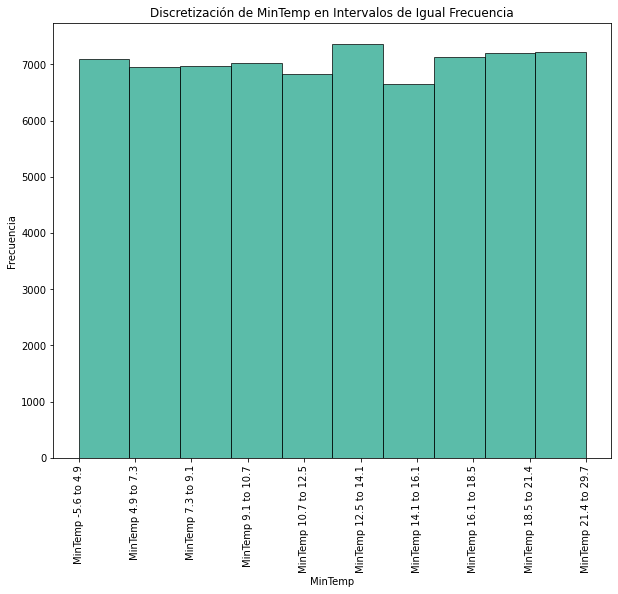

Intervalos de los bins:
[-5.6  4.9  7.3  9.1 10.7 12.5 14.1 16.1 18.5 21.4 29.7]
Etiquetas
['MinTemp -5.6 to 4.9', 'MinTemp 4.9 to 7.3', 'MinTemp 7.3 to 9.1', 'MinTemp 9.1 to 10.7', 'MinTemp 10.7 to 12.5', 'MinTemp 12.5 to 14.1', 'MinTemp 14.1 to 16.1', 'MinTemp 16.1 to 18.5', 'MinTemp 18.5 to 21.4', 'MinTemp 21.4 to 29.7']


In [8]:
# Discretización en intervalos de igual frecuencia (10 intervalos) con retbins=True
num_bins = 10

MinTemp_binned, bin_intervals = pd.qcut(data['MinTemp'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'MinTemp {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['MinTemp'] = pd.cut(data['MinTemp'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['MinTemp'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('MinTemp')
plt.ylabel('Frecuencia')
plt.title('Discretización de MinTemp en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

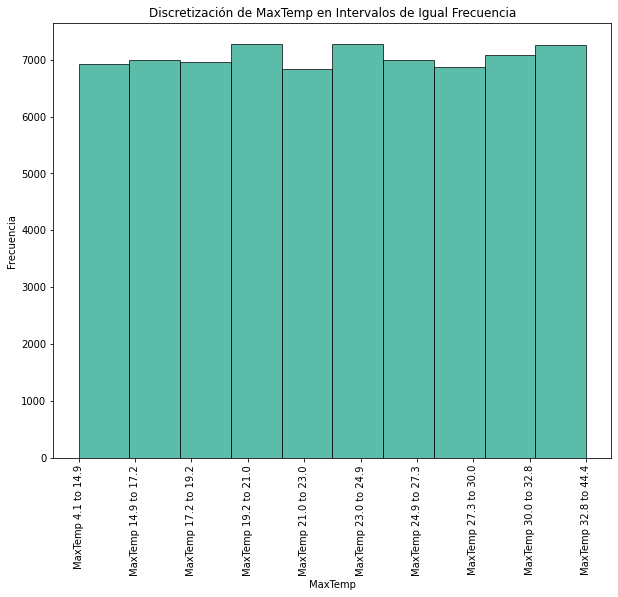

Intervalos de los bins:
[ 4.1 14.9 17.2 19.2 21.  23.  24.9 27.3 30.  32.8 44.4]
Etiquetas
['MaxTemp 4.1 to 14.9', 'MaxTemp 14.9 to 17.2', 'MaxTemp 17.2 to 19.2', 'MaxTemp 19.2 to 21.0', 'MaxTemp 21.0 to 23.0', 'MaxTemp 23.0 to 24.9', 'MaxTemp 24.9 to 27.3', 'MaxTemp 27.3 to 30.0', 'MaxTemp 30.0 to 32.8', 'MaxTemp 32.8 to 44.4']


In [9]:
# Discretización en intervalos de igual frecuencia (10 intervalos) con retbins=True
num_bins = 10

MaxTemp_binned, bin_intervals = pd.qcut(data['MaxTemp'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'MaxTemp {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['MaxTemp'] = pd.cut(data['MaxTemp'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['MaxTemp'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('MaxTemp')
plt.ylabel('Frecuencia')
plt.title('Discretización de MaxTemp en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

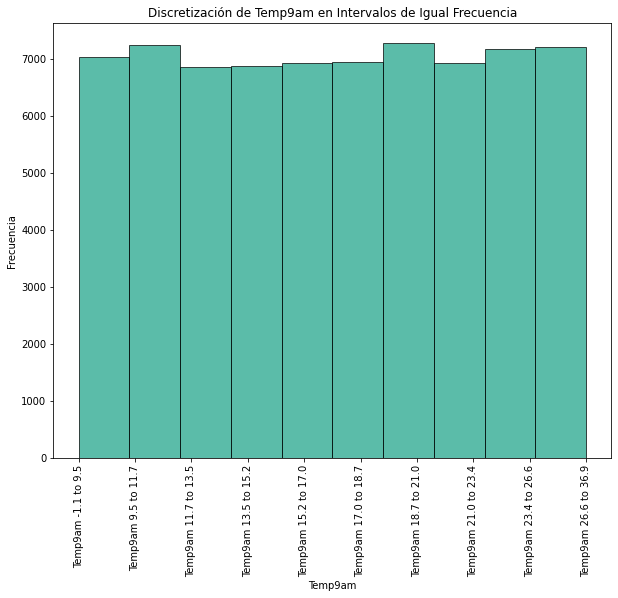

Intervalos de los bins:
[-1.1  9.5 11.7 13.5 15.2 17.  18.7 21.  23.4 26.6 36.9]
Etiquetas
['Temp9am -1.1 to 9.5', 'Temp9am 9.5 to 11.7', 'Temp9am 11.7 to 13.5', 'Temp9am 13.5 to 15.2', 'Temp9am 15.2 to 17.0', 'Temp9am 17.0 to 18.7', 'Temp9am 18.7 to 21.0', 'Temp9am 21.0 to 23.4', 'Temp9am 23.4 to 26.6', 'Temp9am 26.6 to 36.9']


In [10]:
# Discretización en intervalos de igual frecuencia (10 intervalos) con retbins=True
num_bins = 10

MaxTemp_binned, bin_intervals = pd.qcut(data['Temp9am'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'Temp9am {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['Temp9am'] = pd.cut(data['Temp9am'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['Temp9am'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('Temp9am')
plt.ylabel('Frecuencia')
plt.title('Discretización de Temp9am en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

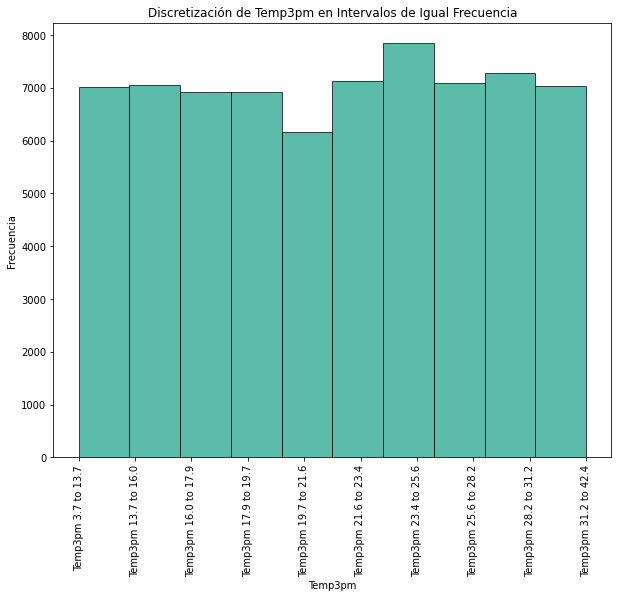

Intervalos de los bins:
[ 3.7 13.7 16.  17.9 19.7 21.6 23.4 25.6 28.2 31.2 42.4]
Etiquetas
['Temp3pm 3.7 to 13.7', 'Temp3pm 13.7 to 16.0', 'Temp3pm 16.0 to 17.9', 'Temp3pm 17.9 to 19.7', 'Temp3pm 19.7 to 21.6', 'Temp3pm 21.6 to 23.4', 'Temp3pm 23.4 to 25.6', 'Temp3pm 25.6 to 28.2', 'Temp3pm 28.2 to 31.2', 'Temp3pm 31.2 to 42.4']


In [11]:
# Discretización en intervalos de igual frecuencia (10 intervalos) con retbins=True
num_bins = 10

MaxTemp_binned, bin_intervals = pd.qcut(data['Temp3pm'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'Temp3pm {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['Temp3pm'] = pd.cut(data['Temp3pm'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['Temp3pm'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('Temp3pm')
plt.ylabel('Frecuencia')
plt.title('Discretización de Temp3pm en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

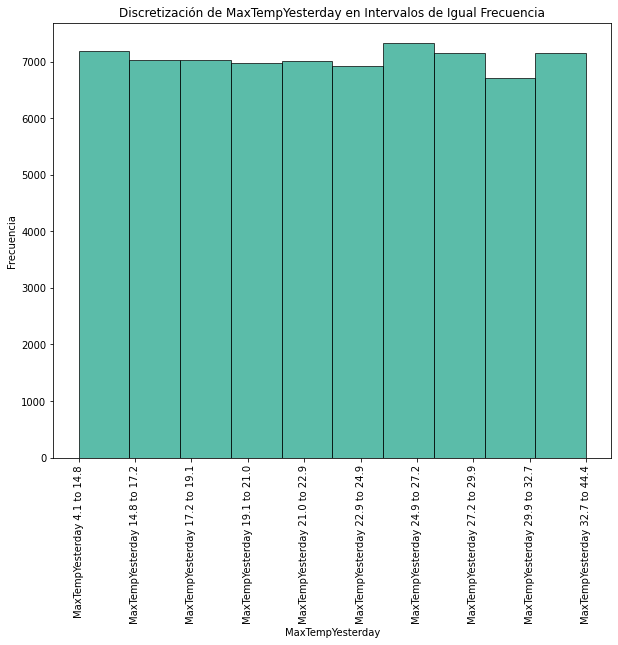

Intervalos de los bins:
[ 4.1 14.8 17.2 19.1 21.  22.9 24.9 27.2 29.9 32.7 44.4]
Etiquetas
['MaxTempYesterday 4.1 to 14.8', 'MaxTempYesterday 14.8 to 17.2', 'MaxTempYesterday 17.2 to 19.1', 'MaxTempYesterday 19.1 to 21.0', 'MaxTempYesterday 21.0 to 22.9', 'MaxTempYesterday 22.9 to 24.9', 'MaxTempYesterday 24.9 to 27.2', 'MaxTempYesterday 27.2 to 29.9', 'MaxTempYesterday 29.9 to 32.7', 'MaxTempYesterday 32.7 to 44.4']


In [12]:
# Discretización en intervalos de igual frecuencia (10 intervalos) con retbins=True
num_bins = 10

MaxTemp_binned, bin_intervals = pd.qcut(data['MaxTempYesterday'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'MaxTempYesterday {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['MaxTempYesterday'] = pd.cut(data['MaxTempYesterday'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['MaxTempYesterday'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('MaxTempYesterday')
plt.ylabel('Frecuencia')
plt.title('Discretización de MaxTempYesterday en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

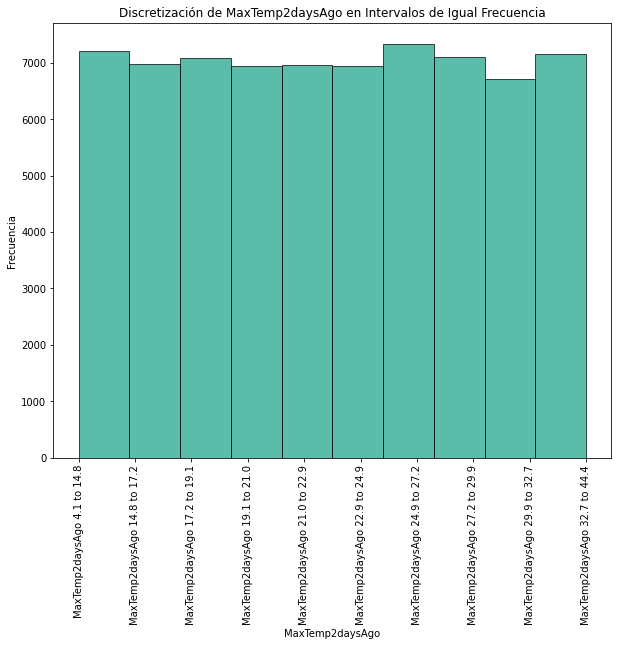

Intervalos de los bins:
[ 4.1 14.8 17.2 19.1 21.  22.9 24.9 27.2 29.9 32.7 44.4]
Etiquetas
['MaxTemp2daysAgo 4.1 to 14.8', 'MaxTemp2daysAgo 14.8 to 17.2', 'MaxTemp2daysAgo 17.2 to 19.1', 'MaxTemp2daysAgo 19.1 to 21.0', 'MaxTemp2daysAgo 21.0 to 22.9', 'MaxTemp2daysAgo 22.9 to 24.9', 'MaxTemp2daysAgo 24.9 to 27.2', 'MaxTemp2daysAgo 27.2 to 29.9', 'MaxTemp2daysAgo 29.9 to 32.7', 'MaxTemp2daysAgo 32.7 to 44.4']


In [13]:
# Discretización en intervalos de igual frecuencia (10 intervalos) con retbins=True
num_bins = 10

MaxTemp_binned, bin_intervals = pd.qcut(data['MaxTemp2daysAgo'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'MaxTemp2daysAgo {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['MaxTemp2daysAgo'] = pd.cut(data['MaxTemp2daysAgo'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['MaxTemp2daysAgo'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('MaxTemp2daysAgo')
plt.ylabel('Frecuencia')
plt.title('Discretización de MaxTemp2daysAgo en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

In [14]:
df = data

### Rainfall

In [15]:
data = df.copy()

In [16]:
# Calcular los cuartiles
quartiles = np.percentile(data['Rainfall'].unique(), [25, 50, 75])

# Mostrar los cuartiles
print("Primer cuartil (Q1):", quartiles[0])
print("Mediana (Q2):", quartiles[1])
print("Tercer cuartil (Q3):", quartiles[2])

# Definir los intervalos para dividir los datos en 4 grupos
intervalos = [min(data['Rainfall']), quartiles[0], quartiles[1], quartiles[2], max(data['Rainfall'])]

# Imprimir los intervalos
print("Intervalos para 4 grupos:")
print(intervalos)

Primer cuartil (Q1): 5.525
Mediana (Q2): 11.649999999999999
Tercer cuartil (Q3): 19.675
Intervalos para 4 grupos:
[0.0, 5.525, 11.649999999999999, 19.675, 28.8]


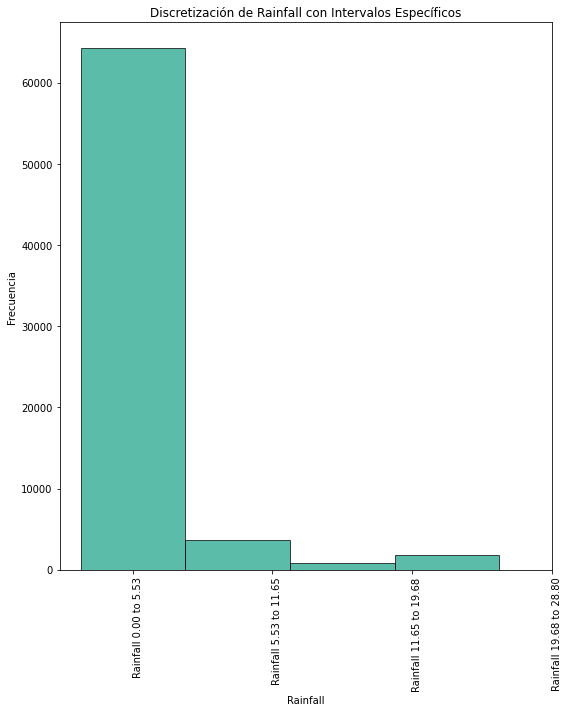

Etiquetas:
['Rainfall 0.00 to 5.53', 'Rainfall 5.53 to 11.65', 'Rainfall 11.65 to 19.68', 'Rainfall 19.68 to 28.80']


In [17]:
# Discretiza los datos y agrega la columna con los datos discretizados
data['Rainfall'] = pd.cut(data['Rainfall'], bins=intervalos, labels=False, include_lowest=True)

# Asigna etiquetas a los intervalos discretizados
bin_labels = [f'Rainfall {intervalos[i]:.2f} to {intervalos[i + 1]:.2f}' for i in range(len(intervalos) - 1)]

# Asigna las etiquetas correspondientes a cada fila
data['Rainfall'] = [bin_labels[int(rainfall_bin)] for rainfall_bin in data['Rainfall']]

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(8, 10))
plt.hist(data['Rainfall'], bins=len(bin_labels), edgecolor='black', alpha=0.7, align='left', color=theme[0])
plt.xlabel('Rainfall')
plt.ylabel('Frecuencia')
plt.title('Discretización de Rainfall con Intervalos Específicos')
plt.xticks(range(len(bin_labels)), bin_labels, rotation=90, ha='left')
plt.tight_layout()
plt.show()

# Muestra las etiquetas para los intervalos de los bins
print("Etiquetas:")
print(bin_labels)

In [18]:
df = data

### Evaporation

In [19]:
data = df.copy()

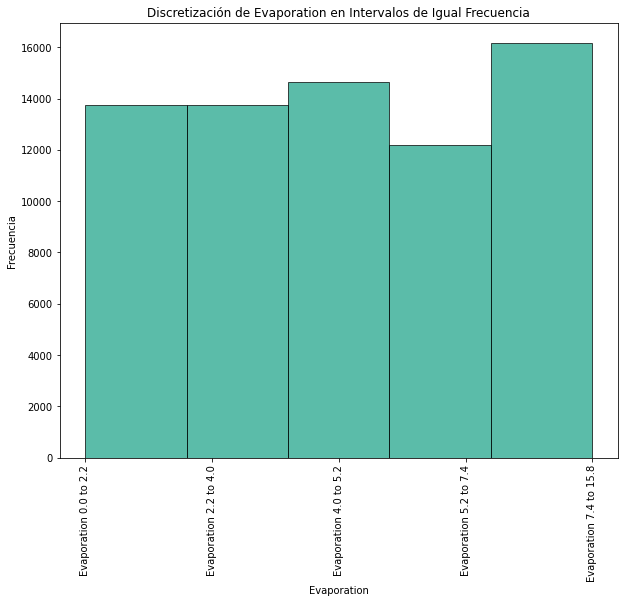

Intervalos de los bins:
[ 0.   2.2  4.   5.2  7.4 15.8]
Etiquetas
['Evaporation 0.0 to 2.2', 'Evaporation 2.2 to 4.0', 'Evaporation 4.0 to 5.2', 'Evaporation 5.2 to 7.4', 'Evaporation 7.4 to 15.8']


In [20]:
# Discretización en intervalos de igual frecuencia (10 intervalos) con retbins=True
num_bins = 5

Evaporation_binned, bin_intervals = pd.qcut(data['Evaporation'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'Evaporation {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['Evaporation'] = pd.cut(data['Evaporation'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['Evaporation'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('Evaporation')
plt.ylabel('Frecuencia')
plt.title('Discretización de Evaporation en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

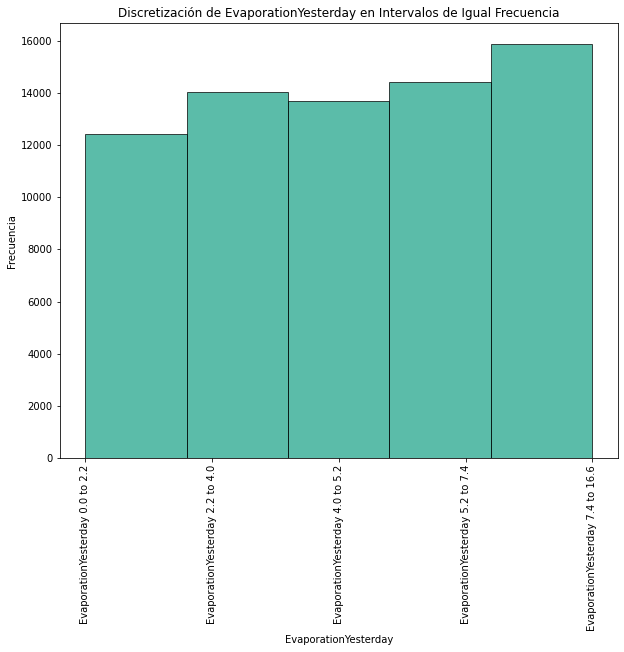

Intervalos de los bins:
[ 0.   2.2  4.   5.2  7.4 16.6]
Etiquetas
['EvaporationYesterday 0.0 to 2.2', 'EvaporationYesterday 2.2 to 4.0', 'EvaporationYesterday 4.0 to 5.2', 'EvaporationYesterday 5.2 to 7.4', 'EvaporationYesterday 7.4 to 16.6']


In [21]:
# Discretización en intervalos de igual frecuencia (10 intervalos) con retbins=True
num_bins = 5

EvaporationYesterday_binned, bin_intervals = pd.qcut(data['EvaporationYesterday'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'EvaporationYesterday {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['EvaporationYesterday'] = pd.cut(data['EvaporationYesterday'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['EvaporationYesterday'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('EvaporationYesterday')
plt.ylabel('Frecuencia')
plt.title('Discretización de EvaporationYesterday en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

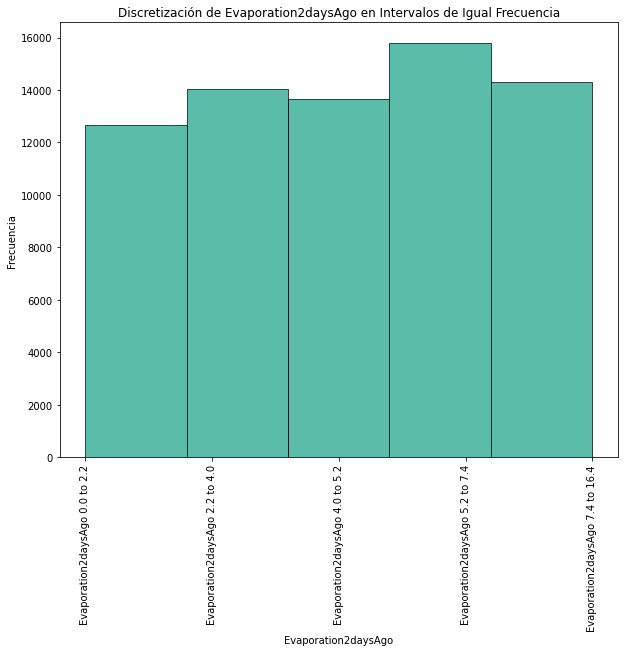

Intervalos de los bins:
[ 0.   2.2  4.   5.2  7.4 16.4]
Etiquetas
['Evaporation2daysAgo 0.0 to 2.2', 'Evaporation2daysAgo 2.2 to 4.0', 'Evaporation2daysAgo 4.0 to 5.2', 'Evaporation2daysAgo 5.2 to 7.4', 'Evaporation2daysAgo 7.4 to 16.4']


In [22]:
# Discretización en intervalos de igual frecuencia (10 intervalos) con retbins=True
num_bins = 5

Evaporation2daysAgo_binned, bin_intervals = pd.qcut(data['Evaporation2daysAgo'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'Evaporation2daysAgo {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['Evaporation2daysAgo'] = pd.cut(data['Evaporation2daysAgo'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['Evaporation2daysAgo'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('Evaporation2daysAgo')
plt.ylabel('Frecuencia')
plt.title('Discretización de Evaporation2daysAgo en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

In [23]:
df = data

### Sunshine

In [24]:
data = df.copy()

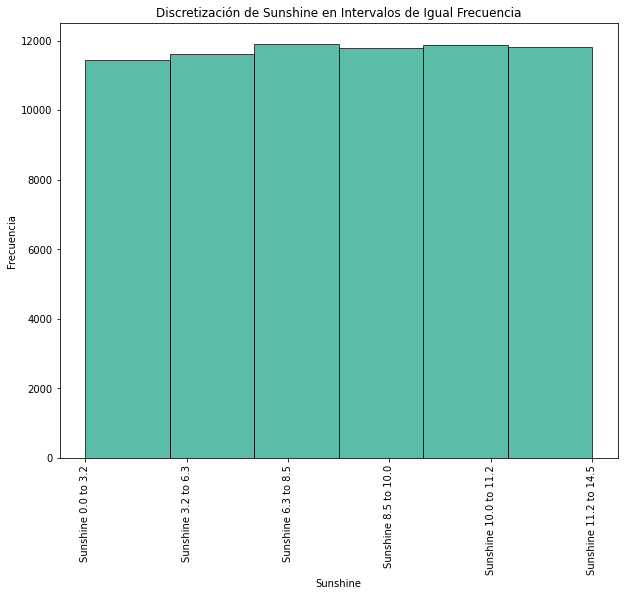

Intervalos de los bins:
[ 0.   3.2  6.3  8.5 10.  11.2 14.5]
Etiquetas
['Sunshine 0.0 to 3.2', 'Sunshine 3.2 to 6.3', 'Sunshine 6.3 to 8.5', 'Sunshine 8.5 to 10.0', 'Sunshine 10.0 to 11.2', 'Sunshine 11.2 to 14.5']


In [25]:
# Discretización en intervalos de igual frecuencia (10 intervalos) con retbins=True
num_bins = 6

Sunshine_binned, bin_intervals = pd.qcut(data['Sunshine'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'Sunshine {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['Sunshine'] = pd.cut(data['Sunshine'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['Sunshine'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('Sunshine')
plt.ylabel('Frecuencia')
plt.title('Discretización de Sunshine en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

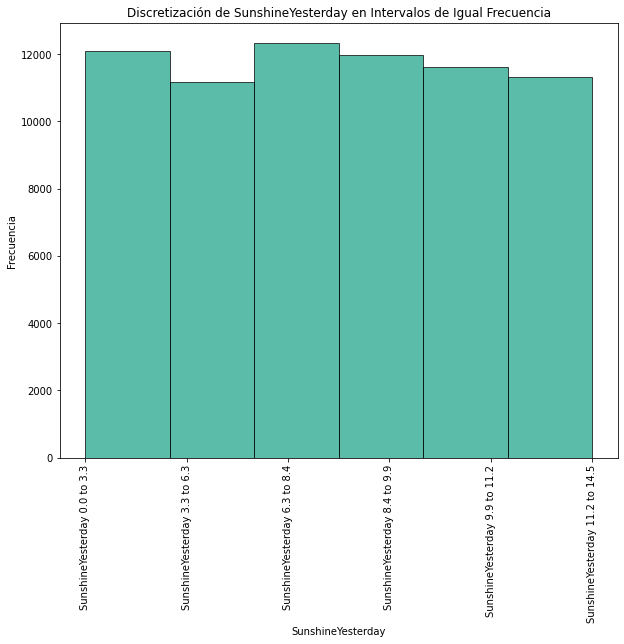

Intervalos de los bins:
[ 0.   3.3  6.3  8.4  9.9 11.2 14.5]
Etiquetas
['SunshineYesterday 0.0 to 3.3', 'SunshineYesterday 3.3 to 6.3', 'SunshineYesterday 6.3 to 8.4', 'SunshineYesterday 8.4 to 9.9', 'SunshineYesterday 9.9 to 11.2', 'SunshineYesterday 11.2 to 14.5']


In [26]:
# Discretización en intervalos de igual frecuencia (10 intervalos) con retbins=True
num_bins = 6

SunshineYesterday_binned, bin_intervals = pd.qcut(data['SunshineYesterday'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'SunshineYesterday {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['SunshineYesterday'] = pd.cut(data['SunshineYesterday'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['SunshineYesterday'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('SunshineYesterday')
plt.ylabel('Frecuencia')
plt.title('Discretización de SunshineYesterday en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

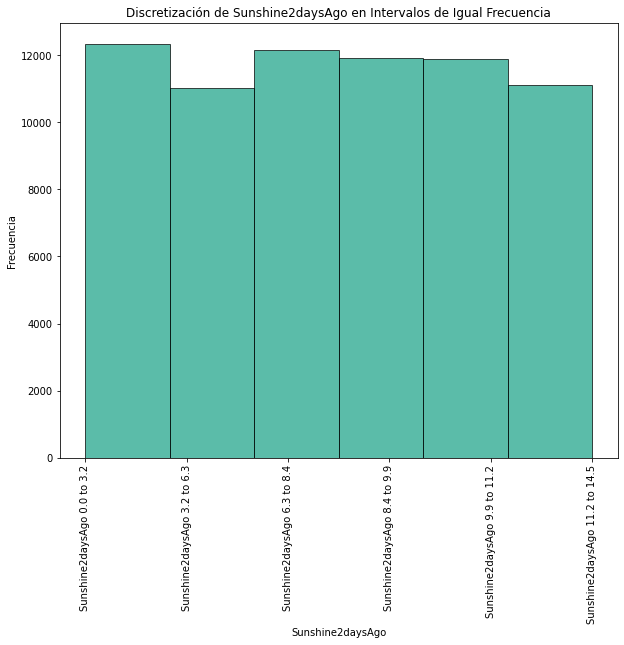

Intervalos de los bins:
[ 0.   3.2  6.3  8.4  9.9 11.2 14.5]
Etiquetas
['Sunshine2daysAgo 0.0 to 3.2', 'Sunshine2daysAgo 3.2 to 6.3', 'Sunshine2daysAgo 6.3 to 8.4', 'Sunshine2daysAgo 8.4 to 9.9', 'Sunshine2daysAgo 9.9 to 11.2', 'Sunshine2daysAgo 11.2 to 14.5']


In [27]:
# Discretización en intervalos de igual frecuencia (10 intervalos) con retbins=True
num_bins = 6

Sunshine2daysAgo_binned, bin_intervals = pd.qcut(data['Sunshine2daysAgo'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'Sunshine2daysAgo {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['Sunshine2daysAgo'] = pd.cut(data['Sunshine2daysAgo'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['Sunshine2daysAgo'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('Sunshine2daysAgo')
plt.ylabel('Frecuencia')
plt.title('Discretización de Sunshine2daysAgo en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

In [28]:
df = data

### Wind Directions

In [29]:
data = df.copy()

#Como los valores para estas columnas van a ser los mismos, vamos a concatenar el nombre de la columan para poderlos indentificar
data['WindGustDir'] = 'WindGustDir ' + data['WindGustDir'].astype(str)

data['WindDir9am'] = 'WindDir9am ' + data['WindDir9am'].astype(str)

data['WindDir3pm'] = 'WindDir3pm ' + data['WindDir3pm'].astype(str)


In [30]:
df = data

### Wind Speed

In [31]:
data = df.copy()

In [32]:
# Discretización en intervalos de igual frecuencia (5 intervalos) con retbins=True
num_bins = 5

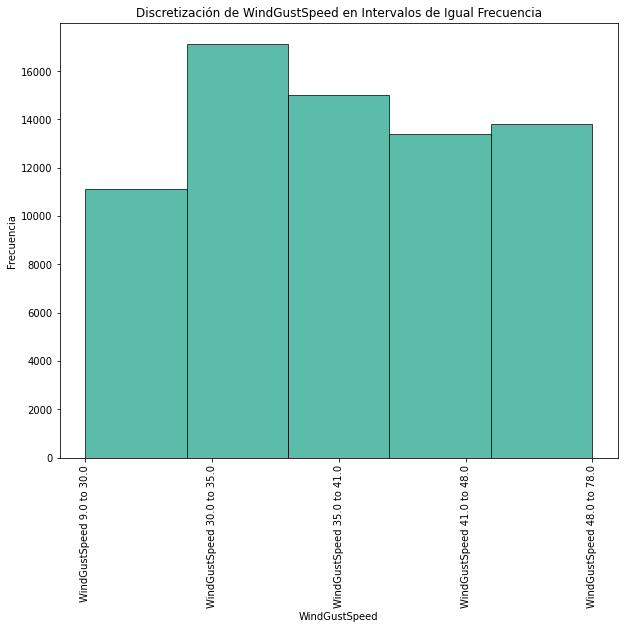

Intervalos de los bins:
[ 9. 30. 35. 41. 48. 78.]
Etiquetas
['WindGustSpeed 9.0 to 30.0', 'WindGustSpeed 30.0 to 35.0', 'WindGustSpeed 35.0 to 41.0', 'WindGustSpeed 41.0 to 48.0', 'WindGustSpeed 48.0 to 78.0']


In [33]:
binned, bin_intervals = pd.qcut(data['WindGustSpeed'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'WindGustSpeed {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['WindGustSpeed'] = pd.cut(data['WindGustSpeed'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['WindGustSpeed'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('WindGustSpeed')
plt.ylabel('Frecuencia')
plt.title('Discretización de WindGustSpeed en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

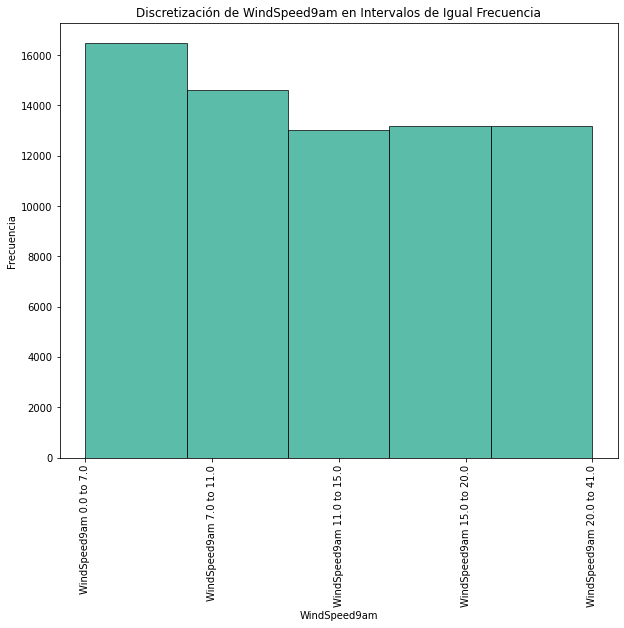

Intervalos de los bins:
[ 0.  7. 11. 15. 20. 41.]
Etiquetas
['WindSpeed9am 0.0 to 7.0', 'WindSpeed9am 7.0 to 11.0', 'WindSpeed9am 11.0 to 15.0', 'WindSpeed9am 15.0 to 20.0', 'WindSpeed9am 20.0 to 41.0']


In [34]:
binned, bin_intervals = pd.qcut(data['WindSpeed9am'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'WindSpeed9am {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['WindSpeed9am'] = pd.cut(data['WindSpeed9am'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['WindSpeed9am'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('WindSpeed9am')
plt.ylabel('Frecuencia')
plt.title('Discretización de WindSpeed9am en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

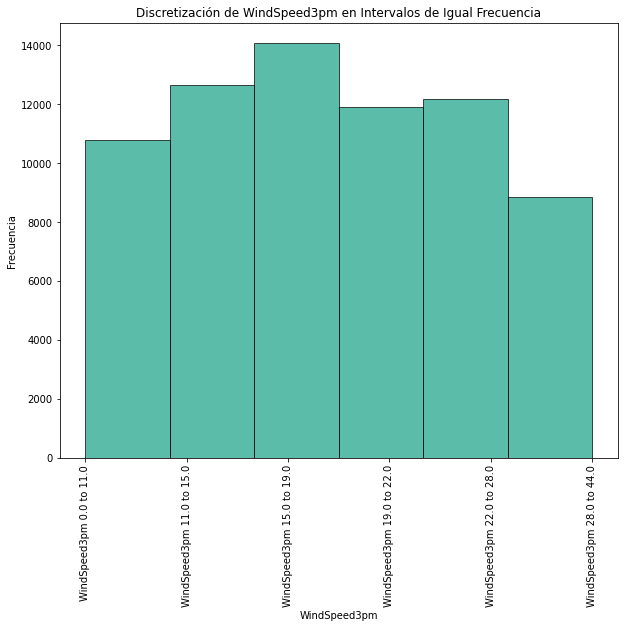

Intervalos de los bins:
[ 0. 11. 15. 19. 22. 28. 44.]
Etiquetas
['WindSpeed3pm 0.0 to 11.0', 'WindSpeed3pm 11.0 to 15.0', 'WindSpeed3pm 15.0 to 19.0', 'WindSpeed3pm 19.0 to 22.0', 'WindSpeed3pm 22.0 to 28.0', 'WindSpeed3pm 28.0 to 44.0']


In [35]:
num_bins = 6

binned, bin_intervals = pd.qcut(data['WindSpeed3pm'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'WindSpeed3pm {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['WindSpeed3pm'] = pd.cut(data['WindSpeed3pm'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['WindSpeed3pm'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('WindSpeed3pm')
plt.ylabel('Frecuencia')
plt.title('Discretización de WindSpeed3pm en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

In [36]:
df=data

### Humidity

In [37]:
data = df.copy()

In [38]:
# Discretización en intervalos de igual frecuencia (8 intervalos) con retbins=True
num_bins = 8

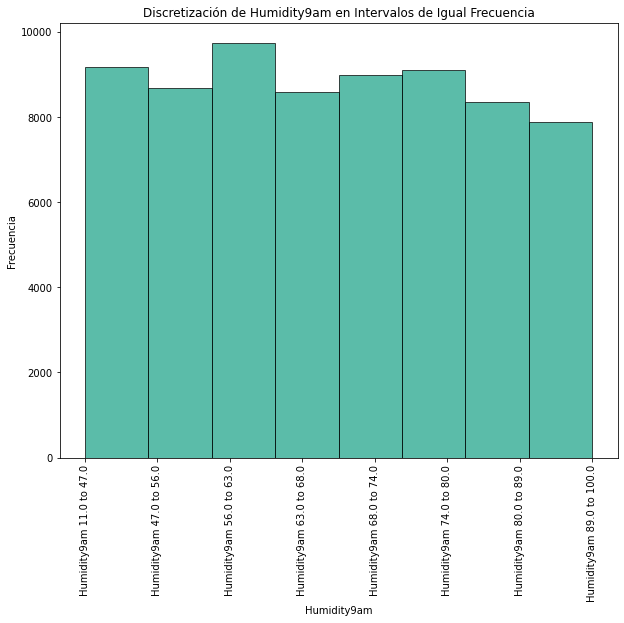

Intervalos de los bins:
[ 11.  47.  56.  63.  68.  74.  80.  89. 100.]
Etiquetas
['Humidity9am 11.0 to 47.0', 'Humidity9am 47.0 to 56.0', 'Humidity9am 56.0 to 63.0', 'Humidity9am 63.0 to 68.0', 'Humidity9am 68.0 to 74.0', 'Humidity9am 74.0 to 80.0', 'Humidity9am 80.0 to 89.0', 'Humidity9am 89.0 to 100.0']


In [39]:
binned, bin_intervals = pd.qcut(data['Humidity9am'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'Humidity9am {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['Humidity9am'] = pd.cut(data['Humidity9am'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['Humidity9am'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('Humidity9am')
plt.ylabel('Frecuencia')
plt.title('Discretización de Humidity9am en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

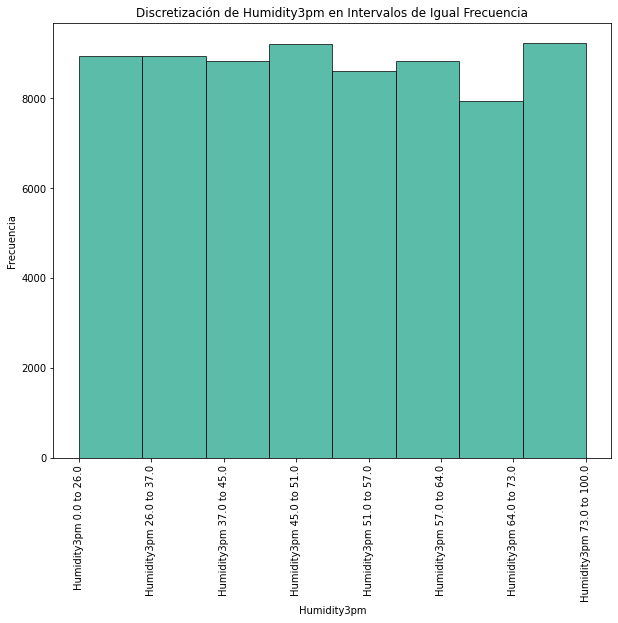

Intervalos de los bins:
[  0.  26.  37.  45.  51.  57.  64.  73. 100.]
Etiquetas
['Humidity3pm 0.0 to 26.0', 'Humidity3pm 26.0 to 37.0', 'Humidity3pm 37.0 to 45.0', 'Humidity3pm 45.0 to 51.0', 'Humidity3pm 51.0 to 57.0', 'Humidity3pm 57.0 to 64.0', 'Humidity3pm 64.0 to 73.0', 'Humidity3pm 73.0 to 100.0']


In [40]:
binned, bin_intervals = pd.qcut(data['Humidity3pm'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'Humidity3pm {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['Humidity3pm'] = pd.cut(data['Humidity3pm'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['Humidity3pm'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('Humidity3pm')
plt.ylabel('Frecuencia')
plt.title('Discretización de Humidity3pm en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

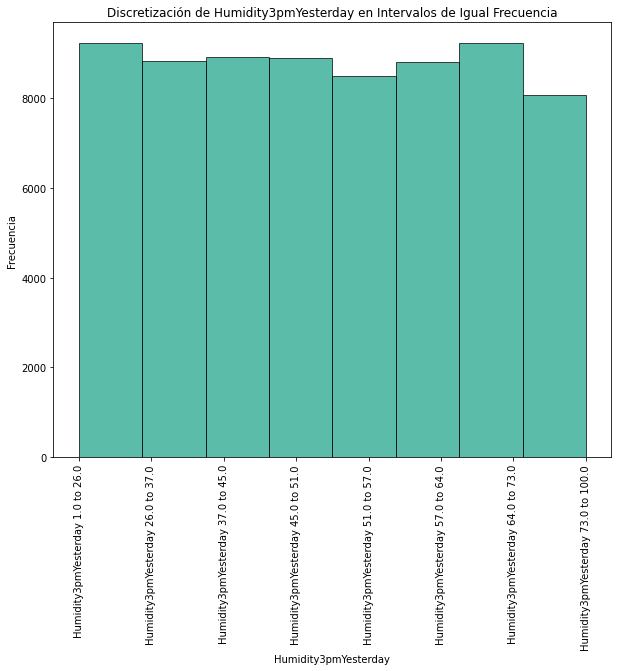

Intervalos de los bins:
[  1.  26.  37.  45.  51.  57.  64.  73. 100.]
Etiquetas
['Humidity3pmYesterday 1.0 to 26.0', 'Humidity3pmYesterday 26.0 to 37.0', 'Humidity3pmYesterday 37.0 to 45.0', 'Humidity3pmYesterday 45.0 to 51.0', 'Humidity3pmYesterday 51.0 to 57.0', 'Humidity3pmYesterday 57.0 to 64.0', 'Humidity3pmYesterday 64.0 to 73.0', 'Humidity3pmYesterday 73.0 to 100.0']


In [41]:
binned, bin_intervals = pd.qcut(data['Humidity3pmYesterday'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'Humidity3pmYesterday {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['Humidity3pmYesterday'] = pd.cut(data['Humidity3pmYesterday'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['Humidity3pmYesterday'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('Humidity3pmYesterday')
plt.ylabel('Frecuencia')
plt.title('Discretización de Humidity3pmYesterday en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

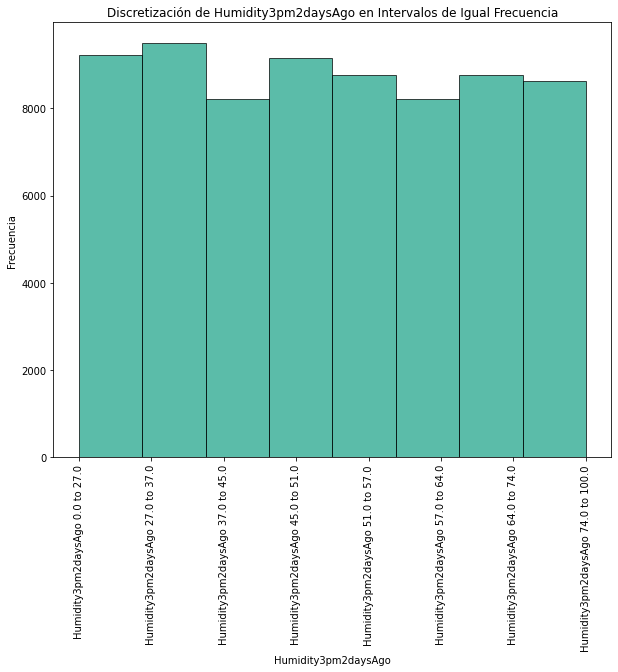

Intervalos de los bins:
[  0.  27.  37.  45.  51.  57.  64.  74. 100.]
Etiquetas
['Humidity3pm2daysAgo 0.0 to 27.0', 'Humidity3pm2daysAgo 27.0 to 37.0', 'Humidity3pm2daysAgo 37.0 to 45.0', 'Humidity3pm2daysAgo 45.0 to 51.0', 'Humidity3pm2daysAgo 51.0 to 57.0', 'Humidity3pm2daysAgo 57.0 to 64.0', 'Humidity3pm2daysAgo 64.0 to 74.0', 'Humidity3pm2daysAgo 74.0 to 100.0']


In [42]:
binned, bin_intervals = pd.qcut(data['Humidity3pm2daysAgo'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'Humidity3pm2daysAgo {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['Humidity3pm2daysAgo'] = pd.cut(data['Humidity3pm2daysAgo'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['Humidity3pm2daysAgo'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('Humidity3pm2daysAgo')
plt.ylabel('Frecuencia')
plt.title('Discretización de Humidity3pm2daysAgo en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

In [43]:
df=data

### Pressure  

In [44]:
data = df.copy()

In [45]:
# Discretización en intervalos de igual frecuencia (8 intervalos) con retbins=True
num_bins = 6

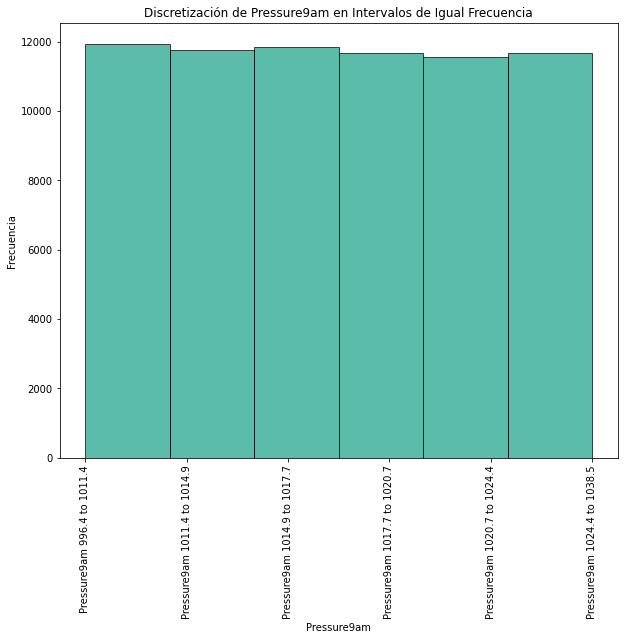

Intervalos de los bins:
[ 996.4 1011.4 1014.9 1017.7 1020.7 1024.4 1038.5]
Etiquetas
['Pressure9am 996.4 to 1011.4', 'Pressure9am 1011.4 to 1014.9', 'Pressure9am 1014.9 to 1017.7', 'Pressure9am 1017.7 to 1020.7', 'Pressure9am 1020.7 to 1024.4', 'Pressure9am 1024.4 to 1038.5']


In [46]:
binned, bin_intervals = pd.qcut(data['Pressure9am'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'Pressure9am {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['Pressure9am'] = pd.cut(data['Pressure9am'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['Pressure9am'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('Pressure9am')
plt.ylabel('Frecuencia')
plt.title('Discretización de Pressure9am en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

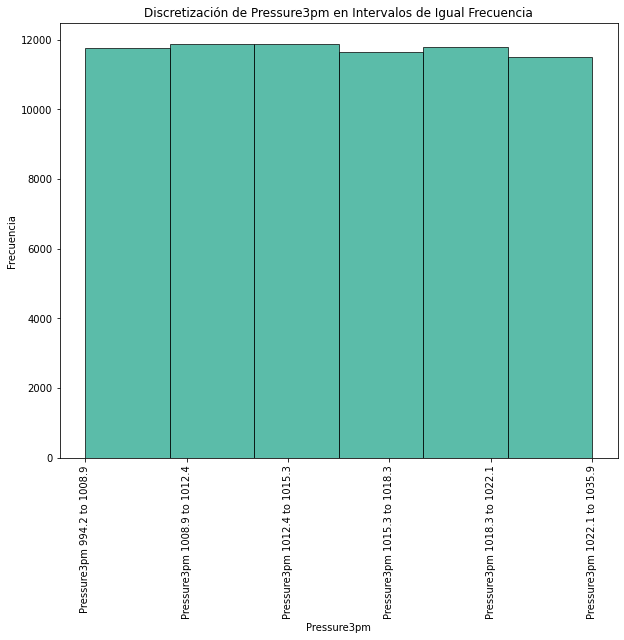

Intervalos de los bins:
[ 994.2 1008.9 1012.4 1015.3 1018.3 1022.1 1035.9]
Etiquetas
['Pressure3pm 994.2 to 1008.9', 'Pressure3pm 1008.9 to 1012.4', 'Pressure3pm 1012.4 to 1015.3', 'Pressure3pm 1015.3 to 1018.3', 'Pressure3pm 1018.3 to 1022.1', 'Pressure3pm 1022.1 to 1035.9']


In [47]:
binned, bin_intervals = pd.qcut(data['Pressure3pm'], q=num_bins, retbins=True, labels=False)

# Asignar etiquetas a los intervalos discretizados
bin_labels = [f'Pressure3pm {i} to {j}' for i, j in zip(bin_intervals[:-1], bin_intervals[1:])]

# Agregar la columna con los datos finales
data['Pressure3pm'] = pd.cut(data['Pressure3pm'], bins=bin_intervals, labels=bin_labels, include_lowest=True)

# Crea un gráfico de barras para visualizar la discretización
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(data['Pressure3pm'], bins=num_bins, edgecolor='black', alpha=0.7, color= theme[0])
plt.xlabel('Pressure3pm')
plt.ylabel('Frecuencia')
plt.title('Discretización de Pressure3pm en Intervalos de Igual Frecuencia')

# Configura las etiquetas del eje x usando los índices de los bins
plt.xticks(range(num_bins), bin_labels, rotation=90)
plt.show()


# Muestra los intervalos de los bins
print("Intervalos de los bins:")
print(bin_intervals)

# Muestra Las etiquetas para los intervalos de los bins
print("Etiquetas")
print(bin_labels)

In [48]:
df = data

### Cloud

In [49]:
data = df.copy()

#Como los valores para estas columnas van a ser los mismos, vamos a concatenar el nombre de la columan para poderlos indentificar
data['Cloud9am'] = 'Cloud9am ' + data['Cloud9am'].astype(str)

data['Cloud3pm'] = 'Cloud3pm ' + data['Cloud3pm'].astype(str)

In [50]:
df = data

### Rain variables

In [51]:
data = df.copy()

#Como los valores para estas columnas van a ser los mismos, vamos a concatenar el nombre de la columan para poderlos indentificar
data['RainToday'] = 'RainToday ' + data['RainToday'].astype(str)

data['RainTomorrow'] = 'RainTomorrow ' + data['RainTomorrow'].astype(str)


data['RainYesterday'] = 'RainYesterday ' + data['RainYesterday'].astype(str)


data['Rain2daysAgo'] = 'Rain2daysAgo ' + data['Rain2daysAgo'].astype(str)


df = data

### Dataset final

In [52]:
print(df.head(100).to_string())

                 MinTemp               MaxTemp                 Rainfall              Evaporation               Sunshine      WindGustDir               WindGustSpeed      WindDir9am      WindDir3pm               WindSpeed9am               WindSpeed3pm                Humidity9am                Humidity3pm                   Pressure9am                   Pressure3pm      Cloud9am      Cloud3pm               Temp9am               Temp3pm      RainToday      RainTomorrow      RainYesterday      Rain2daysAgo               SunshineYesterday               Sunshine2daysAgo              EvaporationYesterday              Evaporation2daysAgo               MaxTempYesterday               MaxTemp2daysAgo                Humidity3pmYesterday                Humidity3pm2daysAgo
0   MinTemp 16.1 to 18.5  MaxTemp 32.8 to 44.4    Rainfall 0.00 to 5.53  Evaporation 7.4 to 15.8  Sunshine 11.2 to 14.5  WindGustDir SSW  WindGustSpeed 41.0 to 48.0  WindDir9am ENE   WindDir3pm SW    WindSpeed9am 0.0 to 7.0  WindSp

In [53]:
#Exportar el csv sin valores nulos
df.to_csv('../data/discretized.csv', index=False)

## Asociación

In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\juanc\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from tabulate import tabulate
import pandas as pd

In [77]:
data = pd.read_csv('../data/discretized.csv')

#Rainfall está afectando al resultado de las reglas y son datos obvios, por lo tanto vamos a quitar esta columna para el análisis
data = data.drop(columns=['Rainfall'])


print(data.head(20).to_string())

                 MinTemp               MaxTemp              Evaporation               Sunshine      WindGustDir               WindGustSpeed      WindDir9am      WindDir3pm               WindSpeed9am               WindSpeed3pm               Humidity9am               Humidity3pm                   Pressure9am                   Pressure3pm      Cloud9am      Cloud3pm               Temp9am               Temp3pm      RainToday      RainTomorrow      RainYesterday      Rain2daysAgo               SunshineYesterday               Sunshine2daysAgo              EvaporationYesterday              Evaporation2daysAgo               MaxTempYesterday               MaxTemp2daysAgo               Humidity3pmYesterday               Humidity3pm2daysAgo
0   MinTemp 16.1 to 18.5  MaxTemp 32.8 to 44.4  Evaporation 7.4 to 15.8  Sunshine 11.2 to 14.5  WindGustDir SSW  WindGustSpeed 41.0 to 48.0  WindDir9am ENE   WindDir3pm SW    WindSpeed9am 0.0 to 7.0  WindSpeed3pm 19.0 to 22.0  Humidity9am 11.0 to 47.0   Humidi

In [78]:
data.describe()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,RainYesterday,Rain2daysAgo,SunshineYesterday,Sunshine2daysAgo,EvaporationYesterday,Evaporation2daysAgo,MaxTempYesterday,MaxTemp2daysAgo,Humidity3pmYesterday,Humidity3pm2daysAgo
count,70468,70468,70468,70468,70468,70468,70468,70468,70468,70468,...,70468,70468,70468,70468,70468,70468,70468,70468,70468,70468
unique,10,10,5,6,16,5,16,16,5,6,...,2,2,6,6,5,5,10,10,8,8
top,MinTemp 10.7 to 12.5,MaxTemp 17.2 to 19.2,Evaporation 2.2 to 4.0,Sunshine 6.3 to 8.5,WindGustDir E,WindGustSpeed 35.0 to 41.0,WindDir9am N,WindDir3pm SW,WindSpeed9am 0.0 to 7.0,WindSpeed3pm 0.0 to 11.0,...,RainYesterday No,Rain2daysAgo No,SunshineYesterday 9.9 to 11.2,Sunshine2daysAgo 6.3 to 8.4,EvaporationYesterday 2.2 to 4.0,Evaporation2daysAgo 2.2 to 4.0,MaxTempYesterday 19.1 to 21.0,MaxTemp2daysAgo 19.1 to 21.0,Humidity3pmYesterday 57.0 to 64.0,Humidity3pm2daysAgo 0.0 to 27.0
freq,7371,7279,16152,11915,9588,17142,8702,6152,16467,14069,...,55020,54790,12319,12350,15878,15786,7322,7342,9229,9494


In [79]:
# Definir la función para usar el algorítmo apriori
def rules_apriori (transactions, soporte, confianza):
    

    # Convertir la lista de ítems en un formato adecuado para Apriori
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


    # Aplicar el algoritmo Apriori para encontrar ítems frecuentes
    frequent_itemsets = apriori(df_encoded, min_support=soporte, use_colnames=True)

    # Encontrar reglas de asociación basadas en los ítems frecuentes y un valor de confianza mínimo
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confianza)

    # Ordenar las reglas por confianza en orden descendente
    rules = rules.sort_values(by=['support', 'confidence'], ascending=[False, False])

    return rules

In [80]:
def print_rules(rules):
    table_data = []
    for indice_iteracion, (index, row) in enumerate(rules.iterrows(), start=1):
        antecedents = list(row['antecedents'])
        consequents = list(row['consequents'])
        support = row['support']
        confidence = row['confidence']
        lift = row['lift']
        table_data.append([indice_iteracion, antecedents, consequents, support, confidence, lift])

    # Definir los encabezados de la tabla
    headers = ["Index","Antecedente", "Consecuente", "Soporte", "Confianza", "Lift"]

    print(tabulate(table_data, headers=headers, tablefmt="grid"))

In [81]:

# Convertir las columnas del DataFrame en listas de transacciones
transactions = []
for index, row in data.iterrows():
    transaction = [str(item) for item in row.tolist() if item != '']
    transactions.append(transaction)



In [82]:
rules = rules_apriori(transactions, 0.1, 0.4)

# Mostrar las reglas de asociación encontradas
print("Reglas de Asociación apriori:")
print_rules(rules)

Reglas de Asociación apriori:
+---------+----------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------+-----------+-------------+----------+
|   Index | Antecedente                                                                                                    | Consecuente                                                                                    |   Soporte |   Confianza |     Lift |
+=========+================================================================================================================+================================================================================================+===========+=============+==========+
|       1 | ['RainTomorrow No']                                                                                            | ['RainToday No']                                                    

In [84]:
# Definir la función para usar el algorítmo apriori
def rules_fp_growth(transactions, soporte, confianza):
   
    # Convertir la lista de ítems en un formato adecuado para Apriori
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Aplicar el algoritmo FP-Growth para encontrar ítems frecuentes
    frequent_itemsets = fpgrowth(df_encoded, min_support=soporte, use_colnames=True)

    # Encontrar reglas de asociación basadas en los ítems frecuentes y un valor de confianza mínimo
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confianza)

    # Ordenar las reglas por confianza en orden descendente
    rules = rules.sort_values(by=['support', 'confidence'], ascending=[False, False])

    return rules

In [85]:

rules = rules_fp_growth(transactions, 0.4, 0.6)
# Mostrar las reglas de asociación encontradas
print("Reglas de Asociación FP-Growth:")
print_rules(rules)

Reglas de Asociación FP-Growth:
+---------+------------------------------------------------------------+------------------------------------------------------------+-----------+-------------+---------+
|   Index | Antecedente                                                | Consecuente                                                |   Soporte |   Confianza |    Lift |
+=========+============================================================+============================================================+===========+=============+=========+
|       1 | ['RainTomorrow No']                                        | ['RainToday No']                                           |  0.670815 |    0.850703 | 1.07668 |
+---------+------------------------------------------------------------+------------------------------------------------------------+-----------+-------------+---------+
|       2 | ['RainToday No']                                           | ['RainTomorrow No']                          

In [86]:
original = pd.read_csv('../data/discretized.csv')

#Dejar el dataset original discretizado
original = original.drop(columns=['Rainfall', 'RainYesterday', 'Rain2daysAgo', 'SunshineYesterday', 'Sunshine2daysAgo', 'EvaporationYesterday',
                          'Evaporation2daysAgo', 'MaxTempYesterday', 'MaxTemp2daysAgo', 'Humidity3pmYesterday', 'Humidity3pm2daysAgo'])


print(original.head(20).to_string())

                 MinTemp               MaxTemp              Evaporation               Sunshine      WindGustDir               WindGustSpeed      WindDir9am      WindDir3pm               WindSpeed9am               WindSpeed3pm               Humidity9am               Humidity3pm                   Pressure9am                   Pressure3pm      Cloud9am      Cloud3pm               Temp9am               Temp3pm      RainToday      RainTomorrow
0   MinTemp 16.1 to 18.5  MaxTemp 32.8 to 44.4  Evaporation 7.4 to 15.8  Sunshine 11.2 to 14.5  WindGustDir SSW  WindGustSpeed 41.0 to 48.0  WindDir9am ENE   WindDir3pm SW    WindSpeed9am 0.0 to 7.0  WindSpeed3pm 19.0 to 22.0  Humidity9am 11.0 to 47.0   Humidity3pm 0.0 to 26.0   Pressure9am 996.4 to 1011.4   Pressure3pm 994.2 to 1008.9  Cloud9am 2.0  Cloud3pm 5.0  Temp9am 23.4 to 26.6  Temp3pm 31.2 to 42.4   RainToday No   RainTomorrow No
1   MinTemp 16.1 to 18.5  MaxTemp 27.3 to 30.0  Evaporation 7.4 to 15.8  Sunshine 11.2 to 14.5    WindGustDir S  W

In [87]:

# Convertir las columnas del DataFrame en listas de transacciones
original_transactions = []
for index, row in original.iterrows():
    transaction = [str(item) for item in row.tolist() if item != '']
    original_transactions.append(transaction)

In [88]:

fpgrowth_rules = rules_fp_growth(original_transactions, 0.1, 0.4)
# Mostrar las reglas de asociación encontradas
print("Reglas de Asociación FP-Growth para dataset original:")
print_rules(fpgrowth_rules)

Reglas de Asociación FP-Growth para dataset original:
+---------+-------------------------------------------------------------------------------------+---------------------------------------------------------------------+-----------+-------------+----------+
|   Index | Antecedente                                                                         | Consecuente                                                         |   Soporte |   Confianza |     Lift |
+=========+=====================================================================================+=====================================================================+===========+=============+==========+
|       1 | ['RainTomorrow No']                                                                 | ['RainToday No']                                                    |  0.670815 |    0.850703 | 1.07668  |
+---------+-------------------------------------------------------------------------------------+-----------------------------